In [ ]:
!python -m pip install -r requirements.txt
!pip install statsmodels
!pip install -U seaborn

  Using cached https://files.pythonhosted.org/packages/55/85/70c6602b078bd9e6f3da4f467047e906525c355a4dacd4f71b97a35d9897/joblib-1.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6e/df/1250c32ab3b532c32a7e47c1cd240faba98f75b1b5150939b10e9bffb758/kiwisolver-1.3.1-cp36-cp36m-win_amd64.whl


  Could not find a version that satisfies the requirement matplotlib==3.4.2 (from -r requirements.txt (line 4)) (from versions: 0.86, 0.86.1, 0.86.2, 0.91.0, 0.91.1, 1.0.1, 1.1.0, 1.1.1, 1.2.0, 1.2.1, 1.3.0, 1.3.1, 1.4.0, 1.4.1rc1, 1.4.1, 1.4.2, 1.4.3, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 2.0.0b1, 2.0.0b2, 2.0.0b3, 2.0.0b4, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.1.0rc1, 2.1.0, 2.1.1, 2.1.2, 2.2.0rc1, 2.2.0, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 3.0.0rc2, 3.0.0, 3.0.1, 3.0.2, 3.0.3, 3.1.0rc1, 3.1.0rc2, 3.1.0, 3.1.1, 3.1.2, 3.1.3, 3.2.0rc1, 3.2.0rc3, 3.2.0, 3.2.1, 3.2.2, 3.3.0rc1, 3.3.0, 3.3.1, 3.3.2, 3.3.3, 3.3.4)
No matching distribution found for matplotlib==3.4.2 (from -r requirements.txt (line 4))
You are using pip version 19.0.1, however version 21.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.1, however version 21.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
!pip list



Package                            Version    
---------------------------------- -----------
alabaster                          0.7.10     
anaconda-client                    1.6.14     
anaconda-navigator                 1.9.7      
anaconda-project                   0.8.2      
appdirs                            1.4.3      
arabic-reshaper                    2.0.14     
asn1crypto                         0.24.0     
astroid                            1.6.3      
astropy                            3.0.2      
astunparse                         1.6.2      
attrs                              18.1.0     
Babel                              2.5.3      
backcall                           0.1.0      
backports.shutil-get-terminal-size 1.0.0      
beautifulsoup4                     4.6.0      
bitarray                           0.8.1      
bkcharts                           0.2        
blaze                              0.11.3     
bleach                             2.1.3      
bokeh        

You are using pip version 19.0.1, however version 21.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import sys 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

## Загрузка данных

Здесь данные пользователей онлайн-курсов. Все студенты сдали курс. 

Переменные:
* 'was_pay' - была ли оплата
* 'watch_unique' - сколько видео посмотрел на обучающей платформе
* 'q_n' - сколько вопросов написал на форуме
* 'ans_n' - сколько ответов написал на форуме
* 'vis_p' - сколько страниц и сколько раз посетил на форуме
* 'duration' - длительность прохождения курса

Эти переменные показывают действия студентов на сайте и описывают студентов лучше любых опросов. 

In [3]:

with open('students.csv', 'rb') as file:
    raw_data = pd.read_csv(file,  encoding='utf8')
raw_data.columns

Index(['course_id', 'hse_user_id', 'course_passing_state_id',
       'course_grade_overall', 'course_grade_ts', 'course_membership_ts',
       'vis_p', 'vis_b', 'course_slug', 'q_n', 'ans_n', 'watch_all',
       'watch_unique', 'video_n', 'what_pay', 'was_pay', 'is_prog_n',
       'is_prog_b', 'is_math_n', 'is_math_b', 'is_peer_n', 'is_peer_b',
       'duration', 'course_name', 'lang', 'field', 'spec', 'spec_b'],
      dtype='object')

In [5]:

data = raw_data.query('course_slug == "python-osnovy-programmirovaniya"')
data = data[['was_pay', 'watch_unique', 'q_n', 'ans_n', 'vis_p', 'duration']].reset_index(drop=True)


In [5]:
data.head(10)

,was_pay,watch_unique,q_n,ans_n,vis_p,duration
0,0,1,0,0,70,69.0
1,0,56,0,0,803,563.0
2,1,50,0,0,981,693.0
3,0,45,0,5,353,40.0
4,1,55,0,0,299,54.0
5,1,44,0,0,809,30.0
6,0,59,0,0,404,85.0
7,1,10,0,0,13,304.0
8,1,47,2,2,581,51.0
9,0,54,0,0,792,122.0


In [50]:
data.shape

(5962, 7)

## Кластеризация

Идея: кластеризуем студентов по всем указанным выше переменным и поймем как принадлежность к кластеру влияет на вероятность оплатить курс. 
Кластер должен выявить сложный паттерн действия студента. Например, кто-то смотрит много видео и часто заходит на форум. Кто-то не смотрит много видео и частно заходит на форум. И т.д.

In [6]:
model = KMeans(n_clusters=4)
model.fit(data.drop('was_pay', axis=1))
all_predictions = model.predict(data.drop('was_pay', axis=1))
print(all_predictions)



[0 2 1 ... 0 1 0]


## Визуализация кластеров

In [7]:
data.loc[:,'cluster'] = pd.Series(all_predictions)

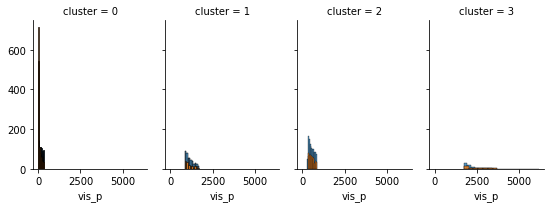

In [8]:
g = sns.FacetGrid(data, col="cluster",  hue = "was_pay",  aspect=.65)
g.map(sns.histplot, "vis_p")



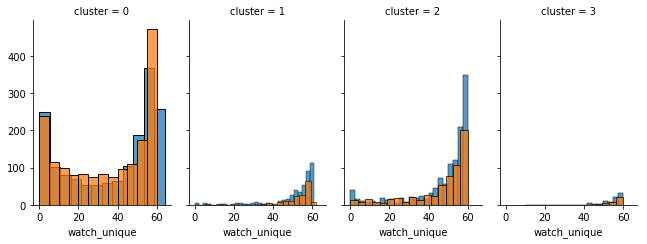

In [9]:
g = sns.FacetGrid(data, col="cluster",  hue = "was_pay", height=3.5, aspect=.65)
g.map(sns.histplot, "watch_unique")

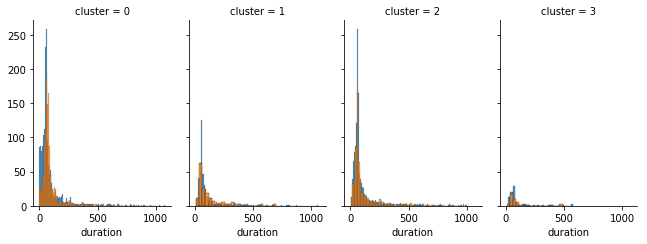

In [10]:
g = sns.FacetGrid(data, col="cluster",  hue = "was_pay", height=3.5, aspect=.65)
g.map(sns.histplot, "duration")

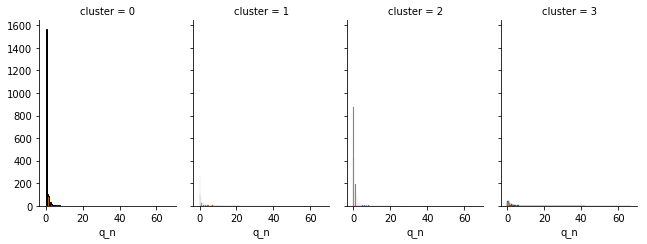

In [11]:
g = sns.FacetGrid(data, col="cluster",  hue = "was_pay", height=3.5, aspect=.65)
g.map(sns.histplot, "q_n")

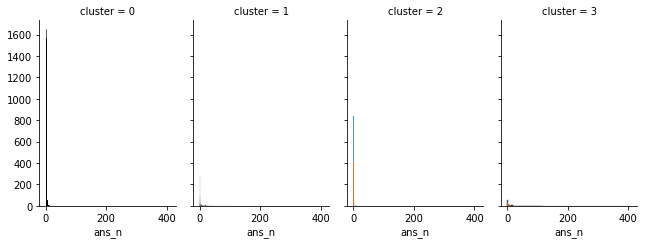

In [12]:
g = sns.FacetGrid(data, col="cluster",  hue = "was_pay", height=3.5, aspect=.65)
g.map(sns.histplot, "ans_n")

Видим четыре кластера:
* 0 – меньше всех посещают форум, мало смотрят видео, задают вопросы
* 1 - смотрят много видео, средне посещают форум, часто пишут вопросы и ответы
* 2 - смотрят много видео, много посещают форум, на форуме не пишут
* 3 - смотрят больше всех видео, больше всех посещают форум, быстрее всех проходят курс


## Строим логистическую регрессию

Логистическая регрессия была выбрана, поскольку зависимая переменная (была оплата или нет) имеет только два значения (да, нет)

In [13]:
model = LogisticRegression(solver='liblinear', random_state=0)

X = data[['cluster']]
y = data['was_pay']
model.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.666735
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                was_pay   No. Observations:                 5962
Model:                          Logit   Df Residuals:                     5961
Method:                           MLE   Df Model:                            0
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                 0.02160
Time:                        22:59:18   Log-Likelihood:                -3975.1
converged:                       True   LL-Null:                       -4062.8
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cluster       -0.3849      0.023    -17.067      0.000      -0.429      -0.341


Видим, что кластеры значимо предсказывают оплату курса. Чтобы взяглнуть какой кластер влиял сильнее - сделаем график

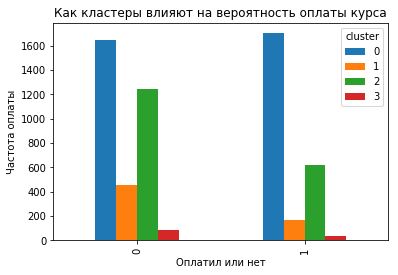

In [15]:
pd.crosstab(data.was_pay,data.cluster).plot(kind='bar')
plt.title('Как кластеры влияют на вероятность оплаты курса')
plt.xlabel('Оплатил или нет')
plt.ylabel('Частота оплаты')
plt.savefig('was_pay_bar')


Вывод: во всех кластерах кроме первого количество оплативших меньше. Первый кластер выделяет только тем, что в нем меньше всего студентов посещавших форум. 

In [ ]:
Возможно, чем меньше студент заходит на форум, тем больше у него шансов оплатить курс.